In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime
import glob

In [2]:
df = pd.read_csv('csv/oversampling_combined_data_labeled.csv')

In [3]:
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
Y = pd.get_dummies(df['label'])


In [5]:
X = df.drop(['label'],axis=1)
X.columns

Index(['temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction',
       'rain', 'cloudiness', 'description', 'condition_type'],
      dtype='object')

In [6]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_accuracy'] >=0.9 and logs['accuracy'] >= 0.9:
            self.model.stop_training = True

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 9)              │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,910 (179.34 KB)

 Trainable params: 45,891 (179.26 KB)

 Non-trainable params: 19 (80.00 B)

In [10]:
history = model.fit(X, Y, epochs=100, batch_size=16 , validation_split=0.3, verbose=1, callbacks=[CustomCallback(),tf.keras.callbacks.TensorBoard(log_dir="./logs")])

Epoch 1/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3447 - loss: 14.0371 - val_accuracy: 0.3592 - val_loss: 1.1330
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3654 - loss: 1.1784 - val_accuracy: 0.3210 - val_loss: 1.2120
Epoch 3/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4096 - loss: 1.1424 - val_accuracy: 0.4913 - val_loss: 1.0096
Epoch 4/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4577 - loss: 1.0509 - val_accuracy: 0.4948 - val_loss: 0.8806
Epoch 5/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5288 - loss: 0.9568 - val_accuracy: 0.6165 - val_loss: 0.8081
Epoch 6/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6578 - loss: 0.7652 - val_accuracy: 0.6524 - val_loss: 0.6661
Epoch 7/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6878 - loss: 0.6414 - val_accuracy: 0.7242 - val_loss: 0.5706
Epoch 8/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6432 - loss: 0.7678 - val_acc

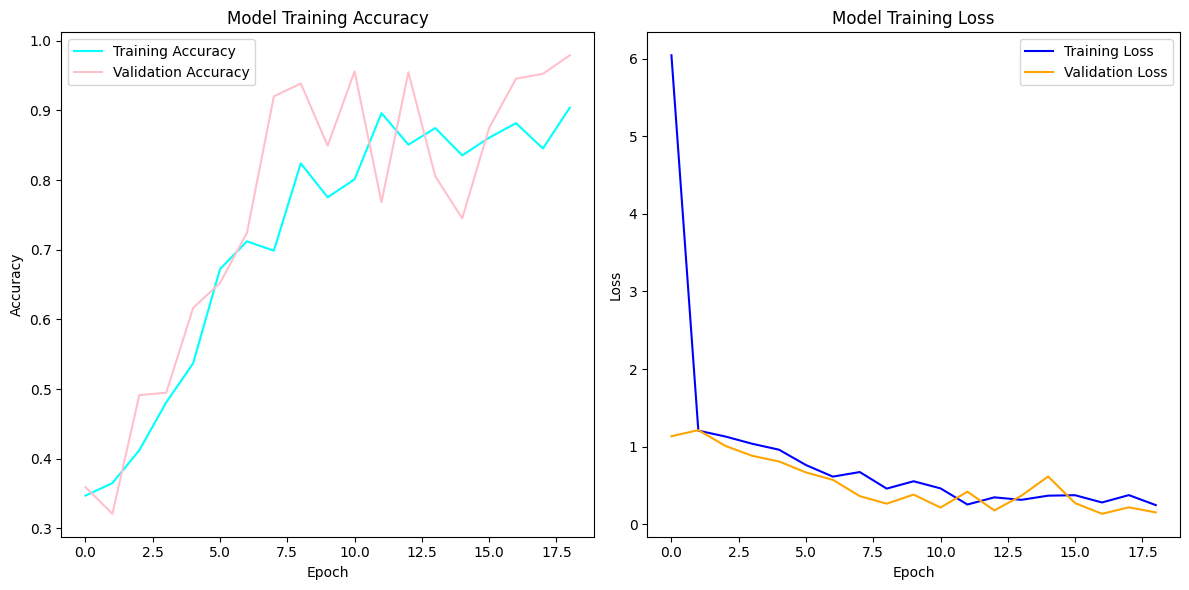

In [11]:
plt.figure(figsize=(12, 6))

# Subplot ketiga untuk training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='cyan')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='pink')
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Subplot keempat untuk training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
existing_files = glob.glob('./prediksi_banjir_*.keras')

if existing_files:
    os.remove(existing_files[0])

now = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

model.save(f"prediksi_banjir_{now}.keras")

In [13]:
label = ['aman','bahaya','waspada']

In [14]:
new_model = tf.keras.models.load_model(f"prediksi_banjir_{now}.keras")
aman = np.round(new_model.predict(np.array([23.46,98,1009,0.43,162,0.0,100,3,0]).reshape(1,-1)),decimals=4) #aman
waspada_md = np.round(new_model.predict(np.array([23.02,99,1010,0.14,309,1.05,86,6,1]).reshape(1,-1)),decimals=4) #waspada moderate rain
waspada_li = np.round(new_model.predict(np.array([23.08,99,1010,0.31,293,0.98,88,4,1]).reshape(1,-1)),decimals=4) #waspada light rain
bahaya = np.round(new_model.predict(np.array([29.56,79,1007,0.83,250,1.35,83,6,1]).reshape(1,-1)),decimals=4) #bahaya

print(aman, label[np.argmax(aman)])
print(waspada_md, label[np.argmax(waspada_md)])
print(waspada_li, label[np.argmax(waspada_li)])
print(bahaya, label[np.argmax(bahaya)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[1. 0. 0.]] aman
[[0.015  0.2458 0.7392]] waspada
[[0.2114 0.0097 0.7789]] waspada
[[0.0022 0.6558 0.3421]] bahaya


In [15]:
df['predicted'] = [label[np.argmax(x)] for x in new_model.predict(X) ]

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [16]:
df.head()

,temperature,humidity,pressure,wind_speed,wind_direction,rain,cloudiness,description,condition_type,label,predicted
0,24.74,96,1009,0.74,286,1.64,100,6,1,bahaya,bahaya
1,24.70,93,1008,0.32,7,0.00,100,3,0,aman,aman
2,29.24,78,1005,1.08,110,1.06,99,4,1,waspada,waspada
3,24.24,97,1009,1.02,17,2.13,100,6,1,bahaya,bahaya
4,23.75,98,1010,0.20,124,1.54,95,6,1,bahaya,bahaya


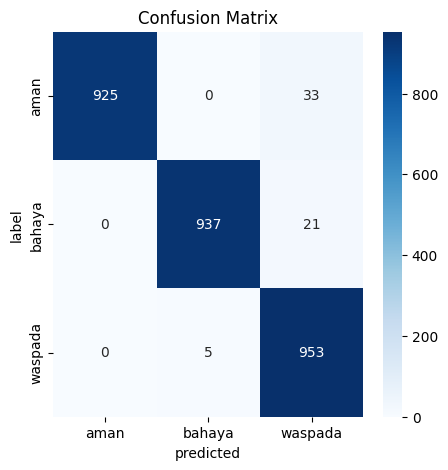

Jumlah prediksi yang tidak tepat: 59


In [17]:
plt.figure(figsize=(5, 5))
sns.heatmap(pd.crosstab(df["label"], df["predicted"]), annot=True, cmap="Blues",fmt='d')
plt.title('Confusion Matrix')
plt.show()

incorrect_predictions = (df["label"] != df["predicted"]).sum()
print("Jumlah prediksi yang tidak tepat:", incorrect_predictions)